In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-06-08 10:11:19.961548: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 10:11:19.996415: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 10:11:19.996962: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 10:11:20.656975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

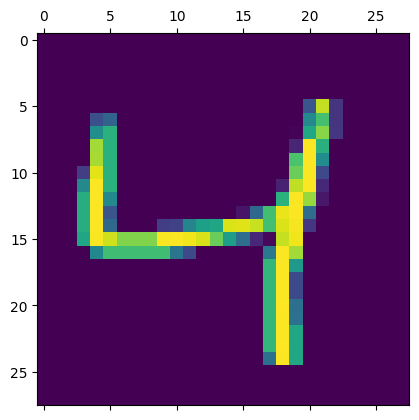

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [13]:
X_test_flattened.shape

(10000, 784)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 523us/step - loss: 0.4703 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.3043 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 519us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 540us/step - loss: 0.2732 - accuracy: 0.9228
Epoch 5/5
1875/1875 [==============================] - 1s 547us/step - loss: 0.2670 - accuracy: 0.9256


model.evaluate(X_test_flattened, y_test)

In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 408us/step - loss: 0.2661 - accuracy: 0.9273


[0.2661045789718628, 0.927299976348877]

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 337us/step


array([2.5339508e-02, 4.3836437e-07, 7.4303925e-02, 9.4191545e-01,
       2.1973283e-03, 1.3424054e-01, 2.3829084e-06, 9.9983311e-01,
       1.3067690e-01, 6.3943464e-01], dtype=float32)

In [23]:
np.argmax(y_predicted[0])

7

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    1,    0,    5,    7,    3,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    9,  927,   13,   10,    5,   12,   10,   38,    3],
       [   3,    0,   21,  902,    0,   36,    5,   11,   25,    7],
       [   1,    1,    4,    1,  919,    0,   11,    5,   10,   30],
       [   9,    3,    1,   21,    7,  788,   17,    6,   33,    7],
       [   8,    3,    6,    1,    7,    9,  919,    2,    3,    0],
       [   1,    5,   24,    5,    8,    0,    0,  959,    4,   22],
       [   6,    8,    6,   14,    9,   22,   10,   12,  881,    6],
       [  11,    7,    1,    8,   28,    8,    0,   29,    8,  909]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

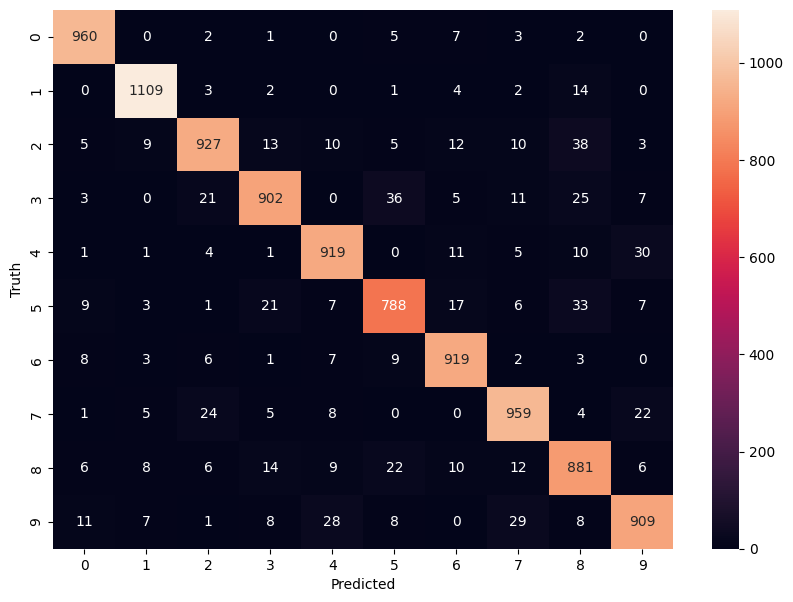

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1256 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 2s 979us/step - loss: 0.0891 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.0670 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.0530 - accuracy: 0.9837


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 505us/step - loss: 0.0809 - accuracy: 0.9751


[0.08087299019098282, 0.9750999808311462]

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2724 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1225 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0856 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0648 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0504 - accuracy: 0.9849


In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 522us/step - loss: 0.0848 - accuracy: 0.9742


[0.08480581641197205, 0.9742000102996826]